# TCC MBA USP EsalQ - Data Science Analytics

## (Maicon C. Melara - Turma 2.1.2 - 2023)


## Importando Bibliotecas

In [1]:
# pip install -U scikit-learnimport json

import json
import pandas as pd # lib pandas
import numpy as np # lib numpy
import datetime # lib datetime

import matplotlib.pyplot as plt # lib para utilização dos gráficos
import seaborn as sns # lib para exibir dados estátisticos

# import numpy as np from scipy import stats
# stats.mode(np.ones(3))[0]

# Necessário para visualização automática dos gráficos no Jupyter
%matplotlib inline

from pathlib import Path
from pandas import json_normalize # package for flattening json in pandas df
from scipy import stats

# lib sklearn
from sklearn.model_selection import train_test_split # lib para definir os dados de treino e de teste
from sklearn.neighbors import KNeighborsClassifier # lib classe KNeighborsClassifier - Classificação 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve
from sklearn import preprocessing # Import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # lib classe RandomForestClassifier - Classificação 

# instalando a biblioteca "yellowbrick" pra plotar os gráficos KNeighborsClassifier e RandonForest 
# pip install yellowbrick
# conda install -c districtdatalabs yellowbrick
from yellowbrick.classifier import ClassificationReport

## Carregando Base de Dados "data-bikes.json"

In [2]:
p = Path(r'C:\Users\maicon.melara\Documents\Python\data\Bases\data-bikes.json')
with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())

df_bikes = json_normalize(data) 

df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   UniqueId                         504 non-null    int64  
 1   PhotoPath                        503 non-null    object 
 2   Licensed                         504 non-null    bool   
 3   ProductCode                      504 non-null    object 
 4   Channels                         504 non-null    object 
 5   LongComment                      384 non-null    object 
 6   IPVApaid                         504 non-null    bool   
 7   Warranty                         504 non-null    bool   
 8   Media.Photos                     503 non-null    object 
 9   Specification.Title              504 non-null    object 
 10  Specification.Make.id            504 non-null    int64  
 11  Specification.Make.Value         504 non-null    object 
 12  Specification.Model.id

## Carregando Base de Dados "data-bikes-fipe.json"

In [3]:
p = Path(r'C:\Users\maicon.melara\Documents\Python\data\Bases\data-bikes-fipe.json')
with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())
                      
df_bikes_fipe = json_normalize(data)  

df_bikes_fipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fipe      501 non-null    float64
 1   UniqueId  504 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 8.0 KB


## Unindo as bases de dados "data-bikes" e "data-bikes-fipe"

In [4]:
df_bikes = df_bikes.join(df_bikes_fipe.set_index('UniqueId')[['Fipe']], on='UniqueId')

## Deletando campos da Base

In [5]:
del df_bikes['PhotoPath']
del df_bikes['ProductCode']
del df_bikes['Channels']
del df_bikes['LongComment']
del df_bikes['FipePercent'] 

In [6]:
del df_bikes['Media.Photos'] 
del df_bikes['Seller.Id'] 
del df_bikes['Seller.SellerType'] 
del df_bikes['Seller.AdType.id']
del df_bikes['Seller.AdType.Value'] 
del df_bikes['Seller.CarDelivery'] 
del df_bikes['Seller.TrocaComTroco']
del df_bikes['Seller.ExceededPlan'] 
del df_bikes['Seller.BudgetInvestimento'] 
del df_bikes['Seller.DealerScore'] 
del df_bikes['Seller.City'] 
del df_bikes['Seller.State'] 
del df_bikes['Seller.FantasyName']  

In [7]:
del df_bikes['Specification.Model.id'] 
del df_bikes['Specification.Make.id'] 
del df_bikes['Specification.Color.IdPrimary']
del df_bikes['Specification.VehicleAttributes'] 
del df_bikes['Specification.YearFabrication']
del df_bikes['Specification.BodyType'] 
del df_bikes['Specification.Title']   
del df_bikes['Specification.CubicCentimeter']     
del df_bikes['Specification.Engine.Id']           
del df_bikes['Specification.Engine.Value']       
del df_bikes['Specification.Break.Id']            
del df_bikes['Specification.Break.Value']         
del df_bikes['Specification.Charge.Id']          
del df_bikes['Specification.Charge.Value']     
del df_bikes['Specification.Cooling.Id']        
del df_bikes['Specification.Cooling.Value']      
del df_bikes['Specification.Shift.Id']         
del df_bikes['Specification.Shift.Value']      
del df_bikes['Specification.Starter.Id']         
del df_bikes['Specification.Starter.Value']            
del df_bikes['Specification.Color.Secundary']   
del df_bikes['Specification.Color.IdSecundary']
del df_bikes['Prices.SearchPrice']

In [8]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UniqueId                     504 non-null    int64  
 1   Licensed                     504 non-null    bool   
 2   IPVApaid                     504 non-null    bool   
 3   Warranty                     504 non-null    bool   
 4   Specification.Make.Value     504 non-null    object 
 5   Specification.Model.Value    504 non-null    object 
 6   Specification.YearModel      504 non-null    float64
 7   Specification.Odometer       504 non-null    float64
 8   Specification.Color.Primary  504 non-null    object 
 9   Seller.OnlyOwner             503 non-null    object 
 10  Prices.Price                 504 non-null    float64
 11  GoodDeal                     30 non-null     object 
 12  Fipe                         501 non-null    float64
dtypes: bool(3), float64(

## Renomeando campos da Base

In [9]:
df_bikes.rename({'Specification.Make.Value': 'Make',
                'Specification.Model.Value': 'Model',
              #  'Specification.Version.Value': 'Version',
                'Specification.YearModel': 'YearModel',
                'Specification.Odometer': 'Odometer',
              #  'Specification.Armored': 'Armored',
                'Prices.Price': 'Price',
                'Specification.Color.Primary': 'Color',
                               }, axis=1, inplace=True)

In [10]:
df_bikes.rename({'Seller.OnlyOwner': 'OnlyOwner',}, axis=1, inplace=True) 

## Convertendo alguns DTypes

In [11]:
df_bikes['YearModel'] = df_bikes['YearModel'].astype('int64')
df_bikes['Make'] = df_bikes['Make'].astype('string')
df_bikes['Model'] = df_bikes['Model'].astype('string') 

## Verificando se há valores nulos após o tratamento dos dados

In [12]:
df_bikes.isnull().sum()

UniqueId       0
Licensed       0
IPVApaid       0
Warranty       0
Make           0
Model          0
YearModel      0
Odometer       0
Color          0
OnlyOwner      1
Price          0
GoodDeal     474
Fipe           3
dtype: int64

## Exibindo a dimensão do DataFrame - (linhas x colunas)

In [17]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UniqueId   504 non-null    int64  
 1   Licensed   504 non-null    bool   
 2   IPVApaid   504 non-null    bool   
 3   Warranty   504 non-null    bool   
 4   Make       504 non-null    string 
 5   Model      504 non-null    string 
 6   YearModel  504 non-null    int64  
 7   Odometer   504 non-null    float64
 8   Color      504 non-null    object 
 9   OnlyOwner  504 non-null    object 
 10  Price      504 non-null    float64
 11  GoodDeal   504 non-null    object 
 12  Fipe       504 non-null    object 
dtypes: bool(3), float64(2), int64(2), object(4), string(2)
memory usage: 41.0+ KB


## Verificando colunas que estão com valores nulos, como: GoodDeal, OnlyOwner, Fipe. Considerando como False

In [14]:
df_bikes['OnlyOwner'].loc[df_bikes['OnlyOwner'].isnull()] = False

C:\Users\maicon.melara\AppData\Local\Temp\ipykernel_2912\237766335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikes['OnlyOwner'].loc[df_bikes['OnlyOwner'].isnull()] = False


In [15]:
df_bikes['GoodDeal'].loc[df_bikes['GoodDeal'].isnull()] = False

C:\Users\maicon.melara\AppData\Local\Temp\ipykernel_2912\615574616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikes['GoodDeal'].loc[df_bikes['GoodDeal'].isnull()] = False


In [16]:
df_bikes['Fipe'].loc[df_bikes['Fipe'].isnull()] = False

C:\Users\maicon.melara\AppData\Local\Temp\ipykernel_2912\3232823127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikes['Fipe'].loc[df_bikes['Fipe'].isnull()] = False


 ## Exibindo a dimensão do DataFrame - (Qtd de linhas x colunas)

In [18]:
df_bikes.shape

(504, 13)

## Exibindo o valor total de motos que estão acima ao da tabela Fipe e IPVA Pago

In [19]:
bikes = (df_bikes['Price'] > df_bikes['Fipe'])

In [20]:
df_bikes[bikes].shape[0]

41

## Exibindo o valor total de motos que estão abaixo ou igual ao da tabela Fipe e IPVA Pago

In [21]:
bikes = (df_bikes['Price'] <= df_bikes['Fipe']) & (df_bikes['IPVApaid'])

In [22]:
df_bikes[bikes].shape[0]

463

## Criando colunas que terão relação na verificação se a moto é ou não um bom negócio (PriceFipeOk e Year>10Years )

In [23]:
df_bikes['PriceFipeOk'] = (df_bikes['Price'] <= df_bikes['Fipe'])

In [24]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UniqueId     504 non-null    int64  
 1   Licensed     504 non-null    bool   
 2   IPVApaid     504 non-null    bool   
 3   Warranty     504 non-null    bool   
 4   Make         504 non-null    string 
 5   Model        504 non-null    string 
 6   YearModel    504 non-null    int64  
 7   Odometer     504 non-null    float64
 8   Color        504 non-null    object 
 9   OnlyOwner    504 non-null    object 
 10  Price        504 non-null    float64
 11  GoodDeal     504 non-null    object 
 12  Fipe         504 non-null    object 
 13  PriceFipeOk  504 non-null    bool   
dtypes: bool(4), float64(2), int64(2), object(4), string(2)
memory usage: 41.5+ KB


## Setando a datetime ou "data atual" - essa coluna ajudará na identificação se a moto tem mais de 10 anos (True- sim, False-não)

In [25]:
now = datetime.datetime.now()

## Verificando se a diferença do ano é superior a 10

In [26]:
df_bikes['Year>10Years'] = (now.year - df_bikes['YearModel'] > 10)

In [27]:
df_bikes.head()

,UniqueId,Licensed,IPVApaid,Warranty,Make,Model,YearModel,Odometer,Color,OnlyOwner,Price,GoodDeal,Fipe,PriceFipeOk,Year>10Years
0,1705741,True,True,True,HONDA,PCX,2019,13800.0,Prata,True,16800.0,False,16800.0,True,False
1,1463983,True,True,True,SUZUKI,GSX-R750,1997,24000.0,Azul,True,21000.0,False,21000.0,True,True
2,1705744,True,True,True,BMW,R 1250 GS TRIPLE BLACK,2022,8000.0,Preto,True,105900.0,False,105900.0,True,False
3,1790809,True,True,True,SUZUKI,V-STROM 1000 ABS,2018,16500.0,Cinza,True,52000.0,False,52000.0,True,False
4,1678884,True,True,True,BMW,G 310 GS,2021,1600.0,Preto,True,32500.0,False,32500.0,True,False


## Utilizando a função describe para exibir as Estatísticas Descritivas das colunas

In [28]:
df_bikes.describe().round(2)

,UniqueId,YearModel,Odometer,Price
count,504.00,504.00,504.00,504.00
mean,1716721.77,2016.88,23233.33,47048.93
std,140477.54,5.70,22905.33,33258.10
min,456672.00,1977.00,0.00,6300.00
25%,1702137.00,2015.00,6500.00,20837.50
50%,1759525.00,2019.00,16500.00,41900.00
75%,1787003.25,2021.00,32261.75,63750.00
max,1809586.00,2023.00,130000.00,310000.00


## Coluna GoodDeal (Bom Negócio)

#### Agrupa por GoodDeal e remove o index (GoodDeal)

In [29]:
bikes_group_good_deal = df_bikes.groupby(['GoodDeal'], as_index=False)

#### Exibe colunas: GoodDeal: valor único (agrupado) e UniqueId: quantidade de registros

In [30]:
bikes_group_good_deal = bikes_group_good_deal.agg({'UniqueId': np.size}).round(2)

#### Renomeando as colunas para apresentá-las

In [31]:
bikes_group_good_deal = bikes_group_good_deal.rename(columns={'GoodDeal':'Bom Negócio', 'UniqueId': 'Quantidade'})

#### Alterando os valores das linhas da coluna Bom Negócio para o label text - (facilitará no uso do gráfico)

In [32]:
bikes_group_good_deal.loc[bikes_group_good_deal['Bom Negócio'] == True, ['Bom Negócio']] = 'Bom Negócio'

In [33]:
bikes_group_good_deal.loc[bikes_group_good_deal['Bom Negócio'] == False, ['Bom Negócio']] = 'Pode não ser um Bom Negócio'

#### Calculando a Porcentagem da coluna Quantidade - (a mesma será usada no gráfico)

In [34]:
bikes_group_good_deal['Porcentagem'] = (bikes_group_good_deal['Quantidade'] / bikes_group_good_deal['Quantidade'].sum()) * 100

#### Ordenando o Dataframe para apresentar primeiro os valores "Valor > Fipe" e posteriormente "Valor <= Fipe" - ( garantirá no gráfico esta ordem para utilização da configuração de cores)

In [35]:
bikes_group_good_deal = bikes_group_good_deal.sort_values(by=['Bom Negócio'], ascending=False)

#### Exibindo o quadro com os valores

In [36]:
bikes_group_good_deal

,Bom Negócio,Quantidade,Porcentagem
0,Pode não ser um Bom Negócio,474,94.047619
1,Bom Negócio,30,5.952381


## Preparando a tabela com o "Preço Médio" e a "Quantidade" de motos de cada marca

#### Agrupando e exibindo motos pelo "preço médio" de cada marca

In [37]:
bikes_group_make_mean = df_bikes.groupby(['Make'], as_index=False)

#### Exibindo colunas:  Model = valor único (agrupado) e Preço = média de preço daquela Marca

In [38]:
bikes_group_make_mean = bikes_group_make_mean.agg({'Price':np.mean, 'UniqueId': np.size}).round(2)

#### Renomeando as colunas para apresentá-las

In [39]:
bikes_group_make_mean = bikes_group_make_mean.rename(columns={'Make':'Marca','Price':'Preço Médio', 'UniqueId': 'Quantidade'})

#### Ordenando em ordem Decrescente pela coluna modelo

In [40]:
bikes_group_make_mean = bikes_group_make_mean.sort_values('Marca', ascending=True)

#### Exibindo tabela com o "Preço Médio" e a "Quantidade" de motos de cada marca

In [41]:
bikes_group_make_mean

,Marca,Preço Médio,Quantidade
0,BMW,68162.76,83
1,BP,25000.00,1
2,CAN-AM,164950.00,2
3,DAFRA,18938.18,11
4,DUCATI,80867.79,19
5,HAOJUE,10517.80,5
6,HARLEY-DAVIDSON,73152.42,66
7,HONDA,31748.68,110
8,INDIAN,79800.00,1
9,KASINSKI,10900.00,1


## Preparando para exibição Gráfico com estes dados para exibição

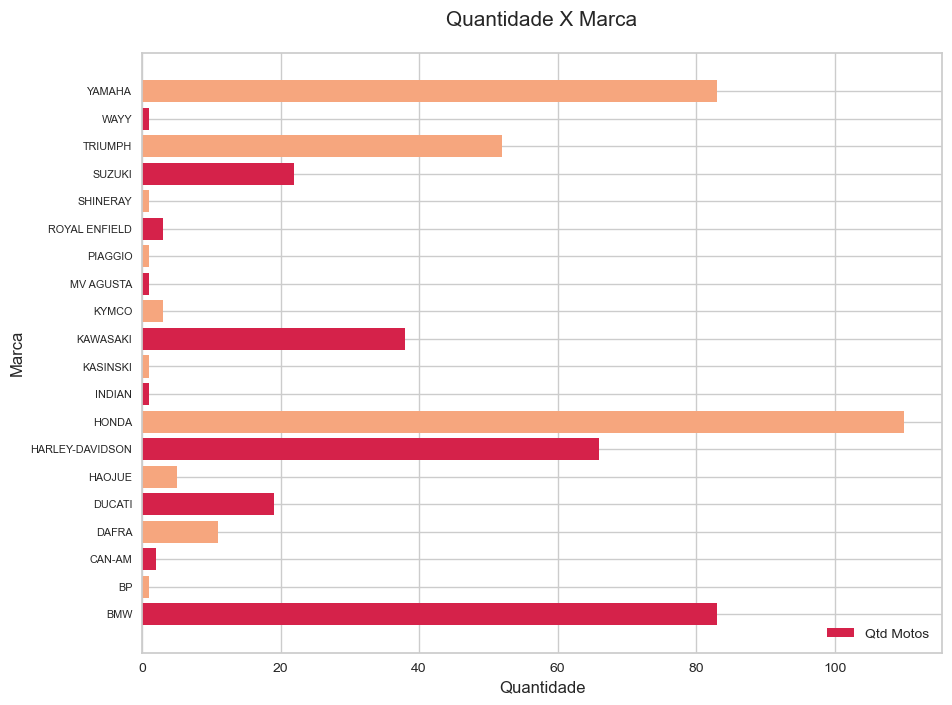

In [42]:
# Gráfico Quantidade de motos de cada Marca

# Extrai o resultado do agrupamento (Preço Médio + Modelo) para exibir no gráfico
fig = plt.figure(figsize=(8,6))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices das marcas
indice = np.arange(len(bikes_group_make_mean))

eixo.barh(indice, bikes_group_make_mean['Quantidade'].round(), align='center', height=0.8,  tick_label=bikes_group_make_mean['Marca'], color=["#d5224a", '#f6a67e'])

# Alterando Título e Labels
eixo.set_title('Quantidade X Marca', fontsize=15, pad=20)
eixo.set_xlabel('Quantidade')
eixo.set_ylabel('Marca')

eixo.set_yticks(indice)
eixo.set_yticklabels(bikes_group_make_mean['Marca'], fontsize=7.8)

# Adicionando Legenda
eixo.legend(['Qtd Motos'], loc = 'lower right')

#### Preparando o agrupamento KM das motos

In [43]:
bikes_group_mean_year = df_bikes.groupby(['YearModel'], as_index=False)

In [44]:
bikes_group_mean_year = bikes_group_mean_year.agg({'Odometer':np.mean, 'UniqueId': np.size}).round(2)

In [45]:
bikes_group_mean_year = bikes_group_mean_year.rename(columns={'YearModel':'Ano','Odometer':'Km', 'UniqueId': 'Quantidade'})

In [46]:
bikes_group_mean_year = bikes_group_mean_year.sort_values('Ano', ascending=False)

In [47]:
bikes_group_mean_year.head()

,Ano,Km,Quantidade
28,2023,1400.70,10
27,2022,4483.08,62
26,2021,11110.59,56
25,2020,13056.07,76
24,2019,19801.16,51


#### Exibindo o Gráfico por KM das motos

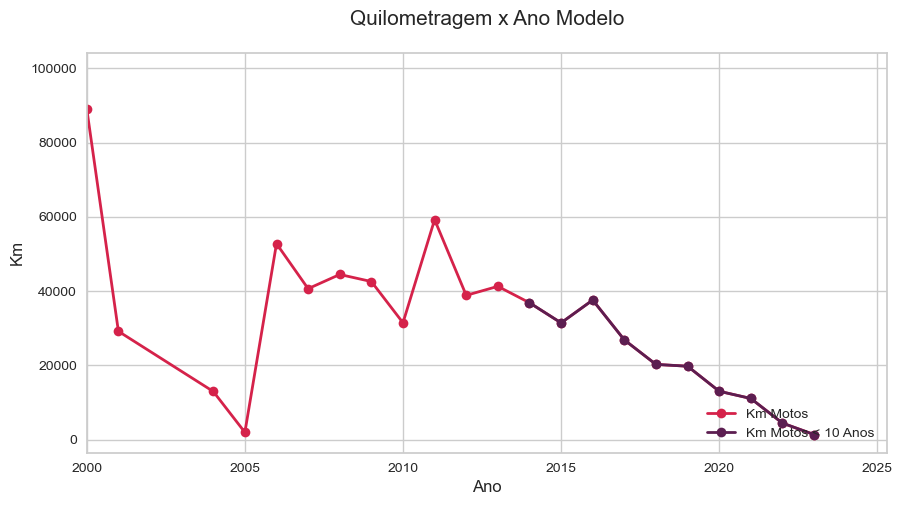

In [48]:
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando gráfico
eixo.plot(bikes_group_mean_year['Ano'], bikes_group_mean_year['Km'], color= '#d5224a', lw=2, marker = 'o')

# Exibe no gráfico somente as motos entre [2000 - Ano Atual]
eixo.set_xlim(2000) # a partir de 2000

# Adicionando cor de destaque para motos que ainda estão entre 10 anos 
bikes_10_years = now.year - bikes_group_mean_year['Ano']  < 10
eixo.plot(bikes_group_mean_year[bikes_10_years]['Ano'], bikes_group_mean_year[bikes_10_years]['Km'], color= '#5c1e51', lw=2, marker = 'o')

# Alterando Título e Labels
eixo.set_title('Quilometragem x Ano Modelo', fontsize=15, pad=20)
eixo.set_ylabel('Km')
eixo.set_xlabel('Ano')

# Adicionando Legenda
eixo.legend(['Km Motos', 'Km Motos < 10 Anos'], loc = 'lower right')

#### Preço Fipe (OK ou Não) das 10 Maiores Marcas 

In [49]:
# obs: Consideremos apenas as 10 maiores marcas de motos 
make_top_10 = ['HONDA','BMW','YAMAHA','HARLEY-DAVIDSON','TRIUMPH','KAWAZAKY','SUZUKI','DUCATI','DAFRA','HAOJUE']

# Agrupa por marca e remove o index (Make)  
bikes_group_make_fipe = pd.get_dummies(df_bikes, columns=['PriceFipeOk']).groupby(['Make'], as_index=False).sum()

# Renomeando as colunas para apresentá-las 
bikes_group_make_fipe = bikes_group_make_fipe.rename(columns={'Make':'Marca', 'PriceFipeOk_True':'Preço Fipe OK', 'PriceFipeOk_False':'Preço Fipe Não OK'})

# Exibe colunas:
# Make: valor único (agrupado)
# PriceFipeOk_True: quantidade de registros Preço Fipe OK
# PriceFipeOk_False: quantidade de registros Preço Fipe Não OK
bikes_group_make_fipe = bikes_group_make_fipe[['Marca', 'Preço Fipe OK', 'Preço Fipe Não OK']]

# Pega apenas os registros que estão com o Preço Fipe OK (PriceFipeOk) e que estão entre as 10 maiores marcas de motos
bikes_group_make_fipe = bikes_group_make_fipe[(bikes_group_make_fipe['Marca'].isin(make_top_10))]

bikes_group_make_fipe

C:\Users\maicon.melara\AppData\Local\Temp\ipykernel_2912\3999423188.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bikes_group_make_fipe = pd.get_dummies(df_bikes, columns=['PriceFipeOk']).groupby(['Make'], as_index=False).sum()


,Marca,Preço Fipe OK,Preço Fipe Não OK
0,BMW,76,7
3,DAFRA,11,0
4,DUCATI,18,1
5,HAOJUE,5,0
6,HARLEY-DAVIDSON,57,9
7,HONDA,106,4
16,SUZUKI,18,4
17,TRIUMPH,43,9
19,YAMAHA,79,4


#### Exibindo o gráfico de Relação das Marcas e Preço Fipe OK e Fipe não OK

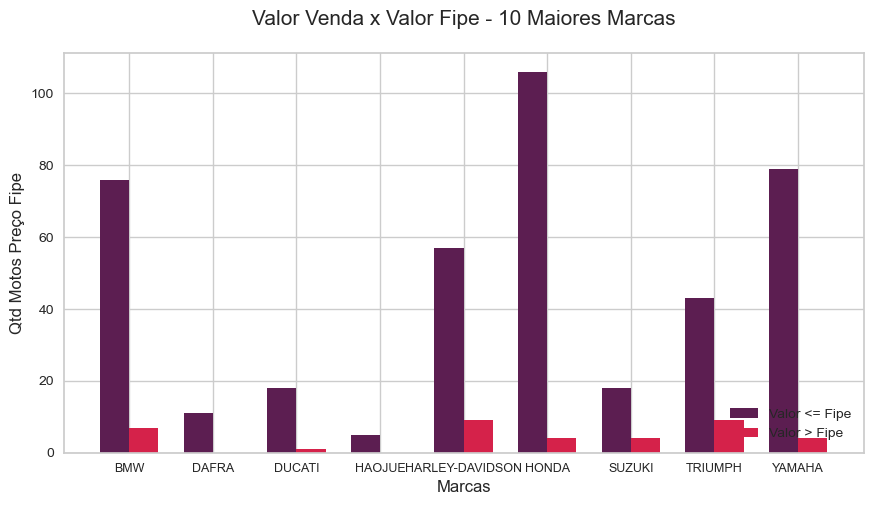

In [50]:
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices das marcas
indice = np.arange(len(bikes_group_make_fipe))

width = 0.35  # tamanho das barras

# Adicionando barras Preço <= Valor Fipe
eixo.bar(indice - width/2, bikes_group_make_fipe['Preço Fipe OK'], width, color= '#5c1e51')

# Adicionando barras Preço > Valor Fipe
eixo.bar(indice + width/2, bikes_group_make_fipe['Preço Fipe Não OK'], width, color= '#d5224a')

# Alterando Título e Labels
eixo.set_title('Valor Venda x Valor Fipe - 10 Maiores Marcas', fontsize=15, pad=20)
eixo.set_xlabel('Marcas')
eixo.set_ylabel('Qtd Motos Preço Fipe')

eixo.set_xticks(indice)
eixo.set_xticklabels(bikes_group_make_fipe['Marca'], fontsize=9)

# Adicionando Legenda
eixo.legend(['Valor <= Fipe', 'Valor > Fipe'], loc = 'lower right')

#### Criando a análise valor Fipe OK e Fipe não OK em porcentagem

In [51]:
bikes_10_years = now.year - df_bikes['YearModel']  <= 10

# Agrupa por PriceFipeOk e remove o index (PriceFipeOk)
# somente para motos onde ano <= 10
bikes_group_fipe_10_years = df_bikes[bikes_10_years].groupby(['PriceFipeOk'], as_index=False)

# Exibe colunas:
# PriceFipeOk: valor único (agrupado)
# UniqueId: quantidade de registros 
bikes_group_fipe_10_years = bikes_group_fipe_10_years.agg({'UniqueId': np.size}).round(2)

# Renomeando as colunas para apresentá-las
bikes_group_fipe_10_years = bikes_group_fipe_10_years.rename(columns={'PriceFipeOk':'Preço Fipe OK', 'UniqueId': 'Quantidade'})


# Alterando os valores das linhas da coluna Preço Fipe OK para o label text
# obs: Isso facilitará no uso do gráfico logo abaixo
bikes_group_fipe_10_years.loc[bikes_group_fipe_10_years['Preço Fipe OK'] == True, ['Preço Fipe OK']] = 'Valor <= Fipe'
bikes_group_fipe_10_years.loc[bikes_group_fipe_10_years['Preço Fipe OK'] == False, ['Preço Fipe OK']] = 'Valor > Fipe'

# Calculando a Porcentagem da coluna Quantidade 
# obs: Essa coluna será usada no gráfico abaixo
bikes_group_fipe_10_years['Porcentagem'] = (bikes_group_fipe_10_years['Quantidade'] / bikes_group_fipe_10_years['Quantidade'].sum()) * 100

# ordena o Dataframe para apresentar primeiro os valores Valor > Fipe e posteriormente Valor <= Fipe
# obs: isso garantirá no gráfico esta ordem para utilização da configuração de cores
bikes_group_fipe_10_years = bikes_group_fipe_10_years.sort_values(by=['Preço Fipe OK'], ascending=False)

bikes_group_fipe_10_years

,Preço Fipe OK,Quantidade,Porcentagem
0,Valor > Fipe,37,8.665105
1,Valor <= Fipe,390,91.334895


In [52]:
df_bikes['OdometerRecommended'] = (df_bikes['Odometer'] / (now.year - df_bikes['YearModel']) < 8000)
df_bikes

# Relação da coluna GoodDeal com a coluna OdometerRecommended

(df_bikes['OdometerRecommended'] & df_bikes['GoodDeal']).sum()


23

#### Exibindo o Gráfico de Agrupamento motos Preço Fipe OK e Porcentagem

Text(0.5, 1.0, 'Porcentagem de Motos x Preço Fipe (até 10 anos)')

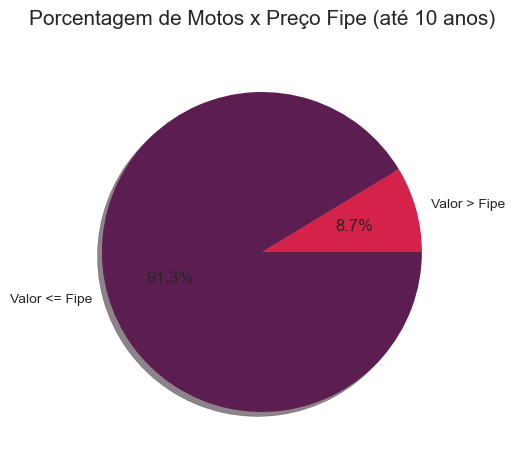

In [53]:
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.pie(bikes_group_fipe_10_years['Porcentagem'], labels=bikes_group_fipe_10_years['Preço Fipe OK'], autopct='%.1f%%', colors=['#d5224a', '#5c1e51'], shadow=True)

# Alterando Título e Labels
eixo.set_title('Porcentagem de Motos x Preço Fipe (até 10 anos)', fontsize=15, pad=20)

#### Adicionando coluna OdometerRecommended. Consideremos como uma moto com quilometragem recomendada se a média de quilometragem por ano for <= 8.000 km rodados.

In [54]:
df_bikes['OdometerRecommended'] = (df_bikes['Odometer'] / (now.year - df_bikes['YearModel']) <= 8000)
df_bikes

,UniqueId,Licensed,IPVApaid,Warranty,Make,Model,YearModel,Odometer,Color,OnlyOwner,Price,GoodDeal,Fipe,PriceFipeOk,Year>10Years,OdometerRecommended
0,1705741,True,True,True,HONDA,PCX,2019,13800.0,Prata,True,16800.0,False,16800.0,True,False,True
1,1463983,True,True,True,SUZUKI,GSX-R750,1997,24000.0,Azul,True,21000.0,False,21000.0,True,True,True
2,1705744,True,True,True,BMW,R 1250 GS TRIPLE BLACK,2022,8000.0,Preto,True,105900.0,False,105900.0,True,False,True
3,1790809,True,True,True,SUZUKI,V-STROM 1000 ABS,2018,16500.0,Cinza,True,52000.0,False,52000.0,True,False,True
4,1678884,True,True,True,BMW,G 310 GS,2021,1600.0,Preto,True,32500.0,False,32500.0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1805150,True,True,True,HONDA,ADV,2022,435.0,Branco,True,22499.0,False,37000.0,True,False,True
500,1751426,True,True,True,YAMAHA,MT-03 ABS,2021,20500.0,Azul,True,26500.0,False,22499.0,False,False,False
501,1585779,True,True,True,HARLEY-DAVIDSON,SOFTAIL FAT BOY,2017,12000.0,Vermelho,True,76000.0,False,26500.0,False,False,True
502,1760383,True,True,True,HONDA,SHADOW 750,2008,64439.0,Preto,True,33000.0,False,76000.0,True,True,True


#### Relação da coluna GoodDeal com a coluna OdometerRecommended

In [55]:
(df_bikes['OdometerRecommended'] & df_bikes['GoodDeal']).sum()

23

#### Correlação dos Atributos - Matriz de Correlação

In [56]:
# Fazendo uma cópia do dataframe original
df_bikes_class = df_bikes.copy()

# Deletando atributos que não serão utilizados
del df_bikes_class['UniqueId']
del df_bikes_class['Make']
del df_bikes_class['Model']
del df_bikes_class['Licensed']

del df_bikes_class['Year>10Years']

#### Convertendo o tipo dos atributos

In [57]:
df_bikes_class['OdometerRecommended'] = df_bikes_class['OdometerRecommended'].astype('int64')
df_bikes_class['IPVApaid'] = df_bikes_class['IPVApaid'].astype('string')
#df_bikes_class['Licensed'] = df_bikes_class['Licensed'].astype('int64')
df_bikes_class['Warranty'] = df_bikes_class['Warranty'].astype('string')
df_bikes_class['OnlyOwner'] = df_bikes_class['OnlyOwner'].astype('int64')
df_bikes_class['PriceFipeOk'] = df_bikes_class['PriceFipeOk'].astype('int64')
#df_bikes_class['Year>10Years'] = df_bikes_class['Year>10Years'].astype('int64')

#### Convertendo dados categóricos em numéricos

In [58]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
#df_bikes_class['Armored']=le.fit_transform(df_bikes_class['Armored'])
df_bikes_class['Color']=le.fit_transform(df_bikes_class['Color'])

#### Gráfico - Matriz de Correlação

C:\Users\maicon.melara\AppData\Local\Temp\ipykernel_2912\3128891536.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = df_small.corr(method='pearson')


Text(-27.277777777777786, 0.5, 'características do núcleo da célula')

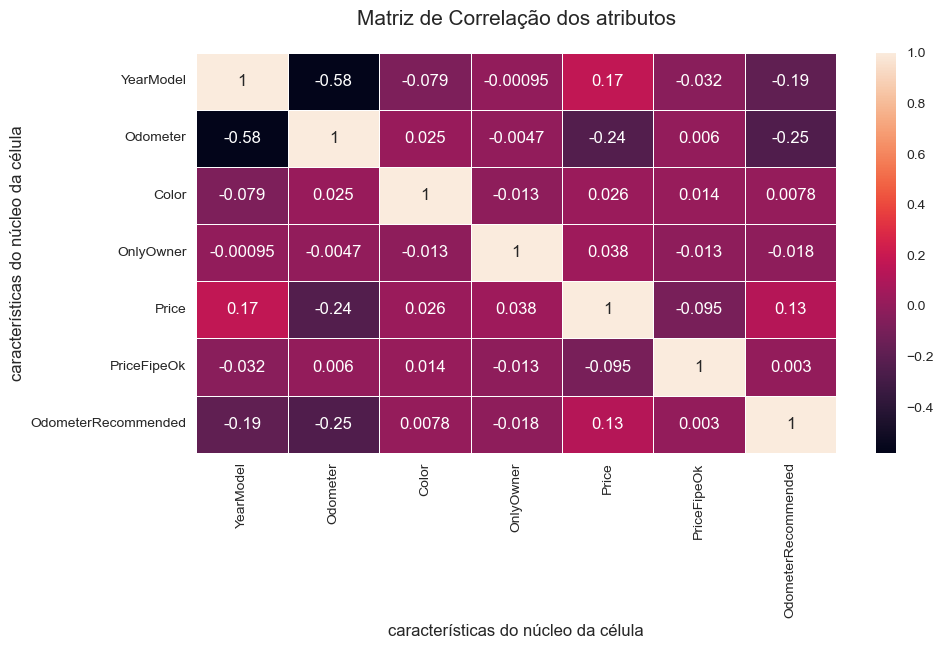

In [59]:
df_small = df_bikes_class.copy()

# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = df_small.corr(method='pearson')

# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)

# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")

#### Classificando a matriz de correlação

In [60]:
correlation_mat = df_small.corr(method='pearson')

corr_pairs = correlation_mat.unstack()

corr_pairs

C:\Users\maicon.melara\AppData\Local\Temp\ipykernel_2912\2835174702.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = df_small.corr(method='pearson')


YearModel            YearModel              1.000000
                     Odometer              -0.579785
                     Color                 -0.078691
                     OnlyOwner             -0.000948
                     Price                  0.171954
                     PriceFipeOk           -0.031820
                     OdometerRecommended   -0.185936
Odometer             YearModel             -0.579785
                     Odometer               1.000000
                     Color                  0.024684
                     OnlyOwner             -0.004684
                     Price                 -0.237256
                     PriceFipeOk            0.006033
                     OdometerRecommended   -0.248049
Color                YearModel             -0.078691
                     Odometer               0.024684
                     Color                  1.000000
                     OnlyOwner             -0.012643
                     Price                  0.

In [61]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

YearModel            Odometer              -0.579785
Odometer             YearModel             -0.579785
OdometerRecommended  Odometer              -0.248049
Odometer             OdometerRecommended   -0.248049
Price                Odometer              -0.237256
Odometer             Price                 -0.237256
OdometerRecommended  YearModel             -0.185936
YearModel            OdometerRecommended   -0.185936
PriceFipeOk          Price                 -0.094522
Price                PriceFipeOk           -0.094522
YearModel            Color                 -0.078691
Color                YearModel             -0.078691
PriceFipeOk          YearModel             -0.031820
YearModel            PriceFipeOk           -0.031820
OnlyOwner            OdometerRecommended   -0.018203
OdometerRecommended  OnlyOwner             -0.018203
PriceFipeOk          OnlyOwner             -0.013268
OnlyOwner            PriceFipeOk           -0.013268
Color                OnlyOwner             -0.

## Criação de Modelos de Machine Learning

#### Preparando os dados

#### Criando a coluna “Class” (1-Sim ou 2-Não), baseado no valor da coluna booleana GoodDeal

In [62]:
df_bikes_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IPVApaid             504 non-null    string 
 1   Warranty             504 non-null    string 
 2   YearModel            504 non-null    int64  
 3   Odometer             504 non-null    float64
 4   Color                504 non-null    int32  
 5   OnlyOwner            504 non-null    int64  
 6   Price                504 non-null    float64
 7   GoodDeal             504 non-null    object 
 8   Fipe                 504 non-null    object 
 9   PriceFipeOk          504 non-null    int64  
 10  OdometerRecommended  504 non-null    int64  
dtypes: float64(2), int32(1), int64(4), object(2), string(2)
memory usage: 41.5+ KB


In [63]:
df_bikes_class['IPVApaid'] = df_bikes_class['IPVApaid'].astype('bool')
df_bikes_class['Warranty'] = df_bikes_class['Warranty'].astype('bool')

In [64]:
df_bikes_class['Class'] = (df_bikes['GoodDeal']).astype('int64')

#### Apagando a coluna GoodDeal da base df_bikes_class

In [65]:
del df_bikes_class['GoodDeal']

In [66]:
df_bikes_class.groupby('Class')['PriceFipeOk'].count()

Class
0    474
1     30
Name: PriceFipeOk, dtype: int64

#### Definindo variáveis Class

In [67]:
X = df_bikes_class.drop('Class', axis=1)
y = df_bikes_class['Class']

In [68]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.70, test_size=0.30, stratify=y)

In [69]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)

KNeighborsClassifier()

#### Acurácia - KNN

In [70]:
knn.score(train_X, train_y)

0.9403409090909091

In [71]:
pred_knn = knn.predict(test_X)

In [72]:
accuracy_score(test_y, pred_knn)

0.9210526315789473

#### Gerando Matriz de Confusão - Modelo KNN

In [73]:
result = confusion_matrix(test_y, pred_knn)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, pred_knn)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,pred_knn)
print("Accuracy:",result2)

Confusion Matrix:
[[140   3]
 [  9   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       143
           1       0.00      0.00      0.00         9

    accuracy                           0.92       152
   macro avg       0.47      0.49      0.48       152
weighted avg       0.88      0.92      0.90       152

Accuracy: 0.9210526315789473


#### Gráfico - Modelo KNN

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


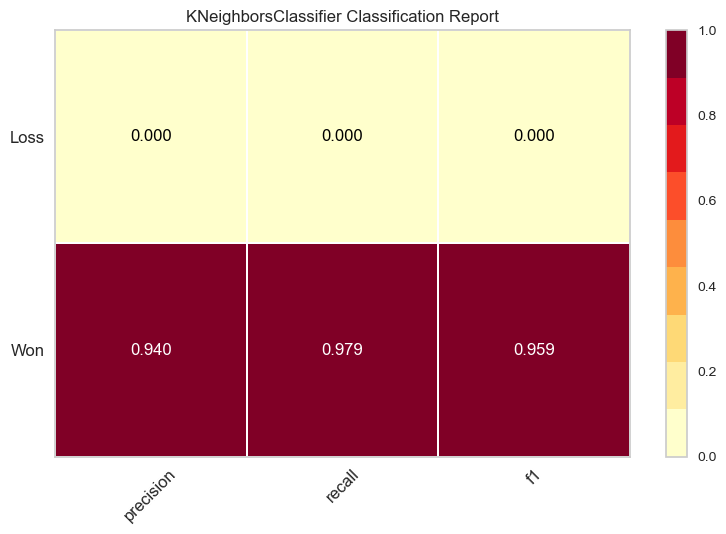

In [74]:
visualizer = ClassificationReport(knn, classes=['Won','Loss'])
visualizer.fit(train_X, train_y) # adicionando o resultado do modelo no objeto visualizer
visualizer.score(test_X, test_y) # adicionando resultados da base de teste
g = visualizer.poof()

#### Resumo da Matriz - Modelo KNN

In [75]:
print (pd.crosstab(test_y, pred_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0  1  All
Real                
0        140  3  143
1          9  0    9
All      149  3  152


In [76]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(train_X, train_y)

RandomForestClassifier(n_estimators=50)

#### Acuácia - RandomForest

In [77]:
rfc.score(train_X, train_y)

1.0

In [78]:
pred_rfc = rfc.predict(test_X)

#### Gerando Matriz de Confusão - Modelo RandomForest

In [79]:
result = confusion_matrix(test_y, pred_rfc)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, pred_rfc)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,pred_rfc)
print("Accuracy:",result2)

Confusion Matrix:
[[143   0]
 [  8   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       143
           1       1.00      0.11      0.20         9

    accuracy                           0.95       152
   macro avg       0.97      0.56      0.59       152
weighted avg       0.95      0.95      0.93       152

Accuracy: 0.9473684210526315


#### Gráfico - Modelo RandonForest

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


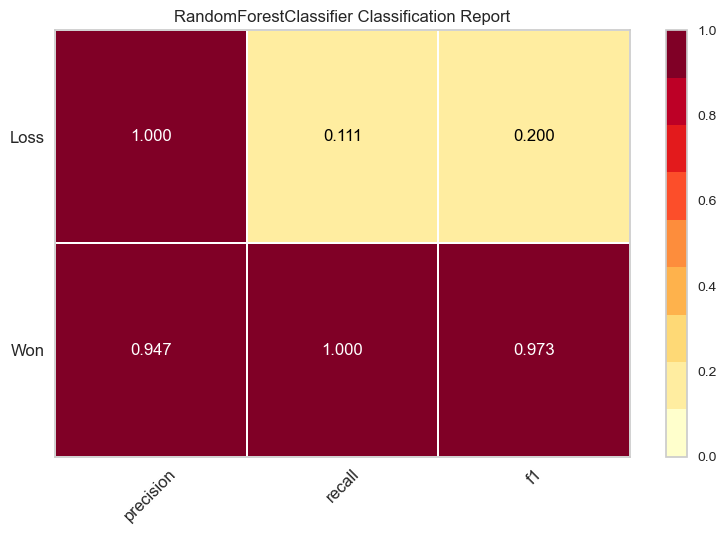

In [80]:
visualizer = ClassificationReport(rfc, classes=['Won','Loss'])
visualizer.fit(train_X, train_y) # adicionando o resultado do modelo no objeto visualizer
visualizer.score(test_X, test_y) # adicionando resultados da base de teste
g = visualizer.poof() 

#### Resumo da Matriz - Modelo RandonForest

In [81]:
print (pd.crosstab(test_y, pred_rfc, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0  1  All
Real                
0        143  0  143
1          8  1    9
All      151  1  152


## Gráfico de importância dos Atributos

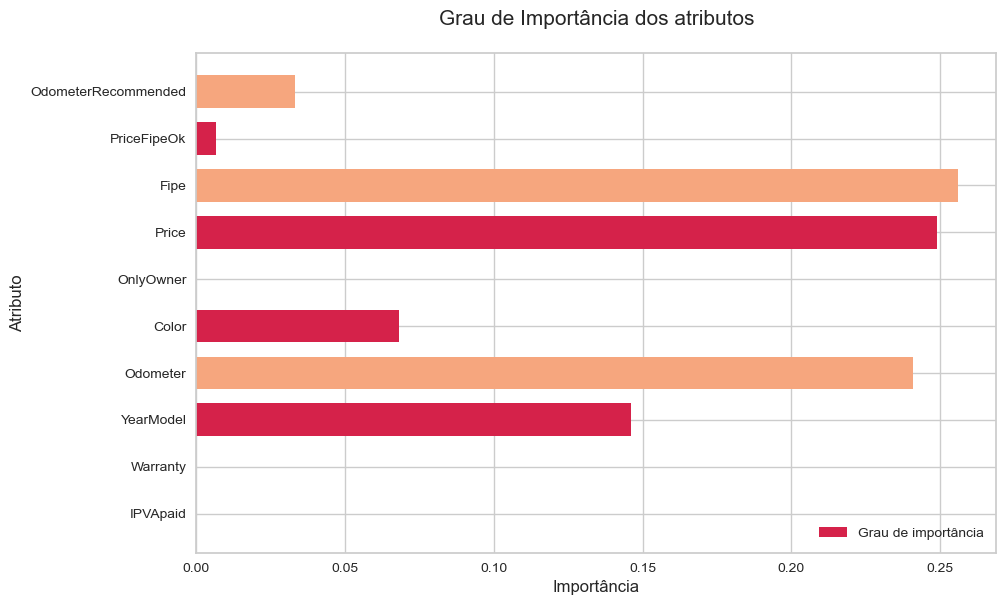

In [82]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices
indice = np.arange(len(X.columns))

eixo.barh(indice, rfc.feature_importances_, align='center', height=0.7,  tick_label=X.columns, color=["#d5224a", '#f6a67e'])

# Alterando Título e Labels
eixo.set_title('Grau de Importância dos atributos', fontsize=15, pad=20)
eixo.set_xlabel('Importância')
eixo.set_ylabel('Atributo')

eixo.set_yticks(indice)

# Adicionando Legenda
eixo.legend(['Grau de importância'], loc = 'lower right')

#### Gráfico - Curva ROC

In [83]:
y_proba_rfc = rfc.predict_proba(test_X)[:,1]
fpr_rfc, tpr_rfc, thresholds = roc_curve(test_y, y_proba_rfc)

In [84]:
y_proba_knn = knn.predict_proba(test_X)[:,1]
fpr_knn, tpr_knn, thresholds = roc_curve(test_y, y_proba_knn)

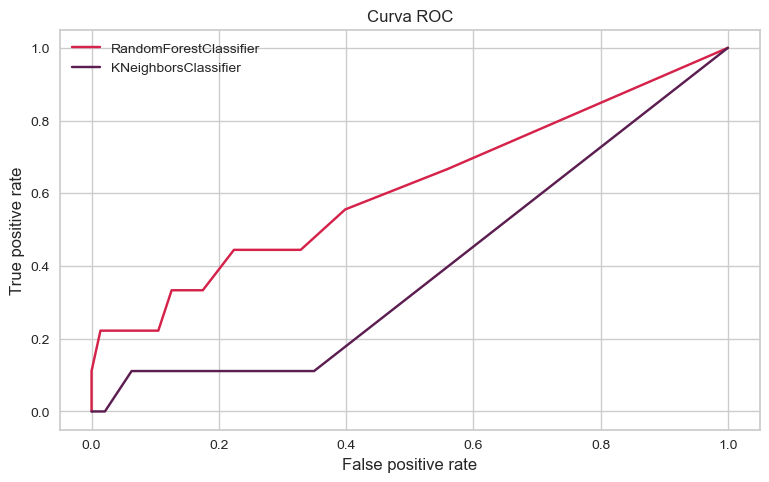

In [85]:
fig = plt.figure(figsize=(7,4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(fpr_rfc, tpr_rfc, label='RandomForestClassifier', color= '#d5224a')
eixo.plot(fpr_knn, tpr_knn, label='KNeighborsClassifier', color= '#5c1e51')

# Alterando Título e Labels
eixo.set_xlabel('False positive rate')
eixo.set_ylabel('True positive rate')
eixo.set_title('Curva ROC')

# Adicionando Legenda
eixo.legend(loc='best')